In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline
plt.rc('font', size = 20)

In [2]:
# read ASCII file of history of LAT LTC VCHP control
fileroot = "/Users/jeggen/ISOC/2019_Q3"
htrHistFile = fileroot+"/htr.history"
htrScatterFile = fileroot+"/htr.scatter"
if os.path.isfile(htrScatterFile):
  f = pd.read_csv(htrScatterFile, parse_dates=[1], delimiter=" ",header=None)
  print("Using file "+htrScatterFile)
else:
  print('The file htr.scatter was not found! Creating from htr.history...\n')
  if os.path.isfile(htrHistFile):
    with open(htrHistFile) as h:
      lines = h.readlines()
    out = open(htrScatterFile,"w+")
    for line in lines:
      line = line.split('\t')
      lineLength = len(line)
      LL3 = (lineLength - 1)/3
      date = line[0]
      hp = 0
      count = 0
      while (LL3 - hp) > 0:
        heater = str(line[1 + hp*3])
        # Don't divide by zero
        if (float(line[2 + hp*3]) != 0) and (float(line[3 + hp*3]) != 0):
          out.write(date+' HP_'+heater+' ''{0:.4f}'.format((float(line[3 + hp*3])/float(line[2 + hp*3])))+'\n')
          #out.write(output)
        hp += 1
    out.close()
    f = pd.read_csv(htrScatterFile, parse_dates=[1], delimiter=" ",header=None)
  else:
    print('The file htr.history was not found! File needed to continue!\n')

The file htr.scatter was not found! Creating from htr.history...



In [3]:
print(np.__version__)
import matplotlib
print(matplotlib.__version__)

1.11.3
2.1.1


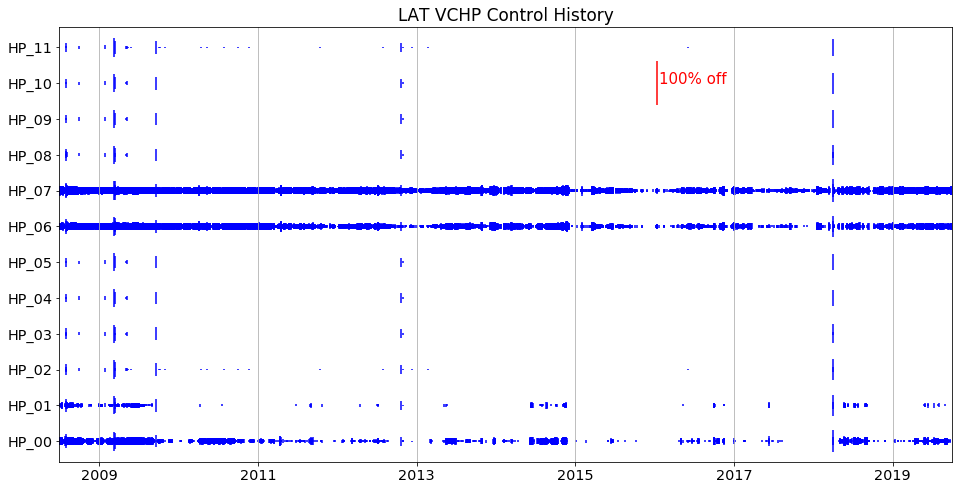

In [4]:
dateh = f[0] 
htr = f[1]
val = f[2]
dates = [pd.to_datetime(d) for d in dateh]
#plt.figure(figsize=(16,6))
fig, ax = plt.subplots(figsize = [16,8])

ax = plt.gca() # get the current axes

datemin = pd.to_datetime('2008-07-01')
datemax = pd.to_datetime('2019-10-01')
plt.xlim(datemin,datemax)
plt.scatter(dates, htr, s = val*1000, c = 'b',marker="|")
plt.title('LAT VCHP Control History',size=17)
#show scale
datehsc = ['2016-01-10']
datesc = [pd.to_datetime(d) for d in datehsc]
htrsc = ['HP_10']
valsc = [2000.0]
plt.scatter(datesc, htrsc, s = valsc, c = 'r',marker="|")
datehtxt = '2016-01-21'
datetxt = pd.to_datetime(datehtxt)
htrtxt = 'HP_10'
plt.text(datetxt, htrtxt, '100% off', color = 'r',size=15)

xax = ax.get_xaxis() # get the x-axis
adf = xax.get_major_formatter() # the auto-formatter
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0,fontsize='x-large' )
plt.setp( ax.yaxis.get_majorticklabels(), rotation=0,fontsize='x-large' )

adf.scaled[1./24] = '%H:%M:%S'  # set the < 1day x-axis scale to H:M
adf.scaled[1.0] = '%Y-%m-%d' # set the > 1day < 1m x-axis scale to Y-m-d
adf.scaled[30.] = '%Y-%m-%d' # set the > 1month < 1Y x-axis scale to Y-m
adf.scaled[365.] = '%Y' # set the > 1year x-axis scale to Y
plt.grid(axis='x')
plt.draw()

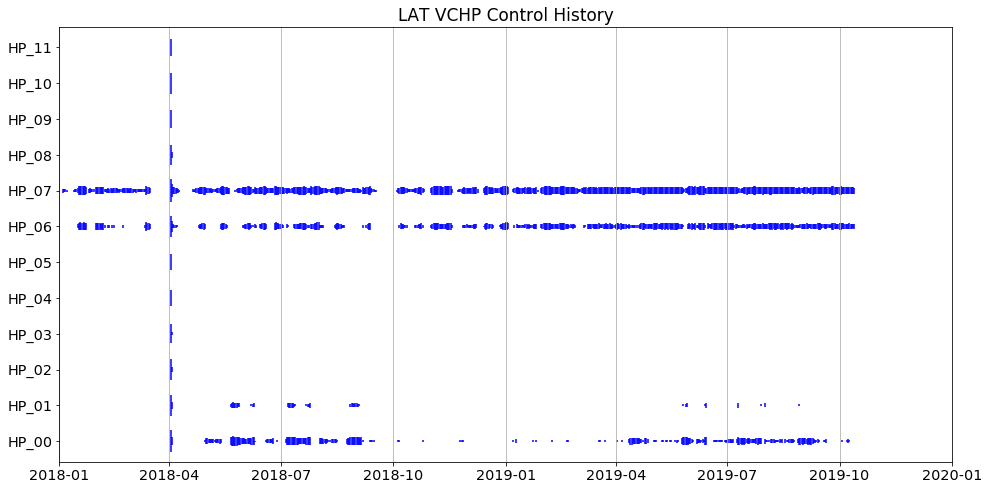

In [6]:
dateh = f[0] 
htr = f[1]
val = f[2]
dates = [pd.to_datetime(d) for d in dateh]
#plt.figure(figsize=(16,6))
fig, ax = plt.subplots(figsize = [16,8])

ax = plt.gca() # get the current axes

datemin = pd.to_datetime('2018-01-01')
datemax = pd.to_datetime('2020-01-01')
plt.xlim(datemin,datemax)
plt.scatter(dates, htr, s = val*1000, c = 'b',marker="|")
plt.title('LAT VCHP Control History',size=17)
#show scale
#datehsc = ['2018-06-03']
#datesc = [pd.to_datetime(d) for d in datehsc]
#htrsc = ['HP_10']
#valsc = [2000.0]
#plt.scatter(datesc, htrsc, s = valsc, c = 'r',marker="|")
#datehtxt = '2018-06-04'
#datetxt = pd.to_datetime(datehtxt)
#htrtxt = 'HP_10'
#plt.text(datetxt, htrtxt, '100% off', color = 'r',size=15)

xax = ax.get_xaxis() # get the x-axis
adf = xax.get_major_formatter() # the auto-formatter
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0,fontsize='x-large' )
plt.setp( ax.yaxis.get_majorticklabels(), rotation=0,fontsize='x-large' )

adf.scaled[1./24] = '%H:%M:%S'  # set the < 1day x-axis scale to H:M
adf.scaled[1.0] = '%Y-%m-%d' # set the > 1day < 1m x-axis scale to Y-m-d
adf.scaled[30.] = '%Y-%m' # set the > 1month < 1Y x-axis scale to Y-m
adf.scaled[365.] = '%Y' # set the > 1year x-axis scale to Y
plt.grid(axis='x')
plt.draw()